In [1]:
import numpy as np
import pandas as pd
import torch
from RL.Utils import plot_test, open_test, test_episode_agent, plot_state
from RL.Environments import MarketGym
from RL.Rewards import mean_step
from RL.Agents import DQN, dynamicTWAP
import matplotlib.pyplot as plt
from collections import Counter
import json
plt.style.use('solarized_dark')
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (20,4)
plt.rcParams['axes.grid'] = True

### Variable estado para el step t:

* $\frac{\text{Tiempo transcurrido}_t}{\text{Tiempo total}}$

* $\frac{\text{Inventario restante}_t}{\text{inventario Total}}$

* clip($\frac{p_t-\overline{p}_t}{\text{std}(p)_t}$, max=4, min=-4), 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; con $\overline{p}_t$ y $\text{std}(p)_t$ calculadas sobre una ventana de 150 steps


* clip($\text{fma}'_t$, max=4, min=-4), 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; siendo $\text{fma}'_t = \frac{\text{fma}_t-\overline{p}_t}{\text{std}(p)_t}$ y $\text{fma}_t$ la media movil rápida de los precios calculada sobre una ventana de 30 steps

* clip($\text{sma}'_t$, max=4, min=-4), 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; siendo $\text{sma}'_t = \frac{\text{sma}_t-\overline{p}_t}{\text{std}(p)_t}$ y $\text{sma}_t$ la media movil lenta de los precios calculada sobre una ventana de 100 steps

* $\text{std}(p)_t$

* $\text{MACD}_t$ = clip($\text{fma}_t - \text{sma}_t$, max=4, min=-4)

* clip($\text{MACDsignal}_t$, max=4, min=-4),

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; siendo $\text{MACDsignal}_t$ la media movil exponencial de $\text{MACD}$ con una vida media de 33 periodos

* clip($\text{MACDdiv}_t$, max=4, min=-4), 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; siendo $\text{MACDdiv}_t = \text{MACD}_t - \text{MACDsignal}_t$

* $\text{RSI}_t \in [0,1]$, 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\text{RSI}$ es el "Relative Strength Index": $\text{RSI}_t = 1 - \frac{1}{1 - \frac{\overline{\text{Ganancias}}_t}{\overline{\text{Perdidas}}_t}}$ siendo $\overline{\text{Ganancias}}_t$ el promedio de veces que ha subido el precio en una ventana de 33 steps 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; y $\overline{\text{Perdidas}}_t$ el promedio de veces que ha bajado el precio en una ventana de 33 steps

### Metric (mean_step):

$\text{metric}_t = \text{price}_t \cdot \text{action}_t - \overline{\text{price}} \cdot \text{action}_t$, con $\overline{\text{price}}$ el precio medio del episodio

$\text{metric} = \sum_{t}{\text{metric}_t}$


* DDQN Trained with mean reward function

        Training:
<img src="./weights/DDQN_mean_step.png" width=800/>

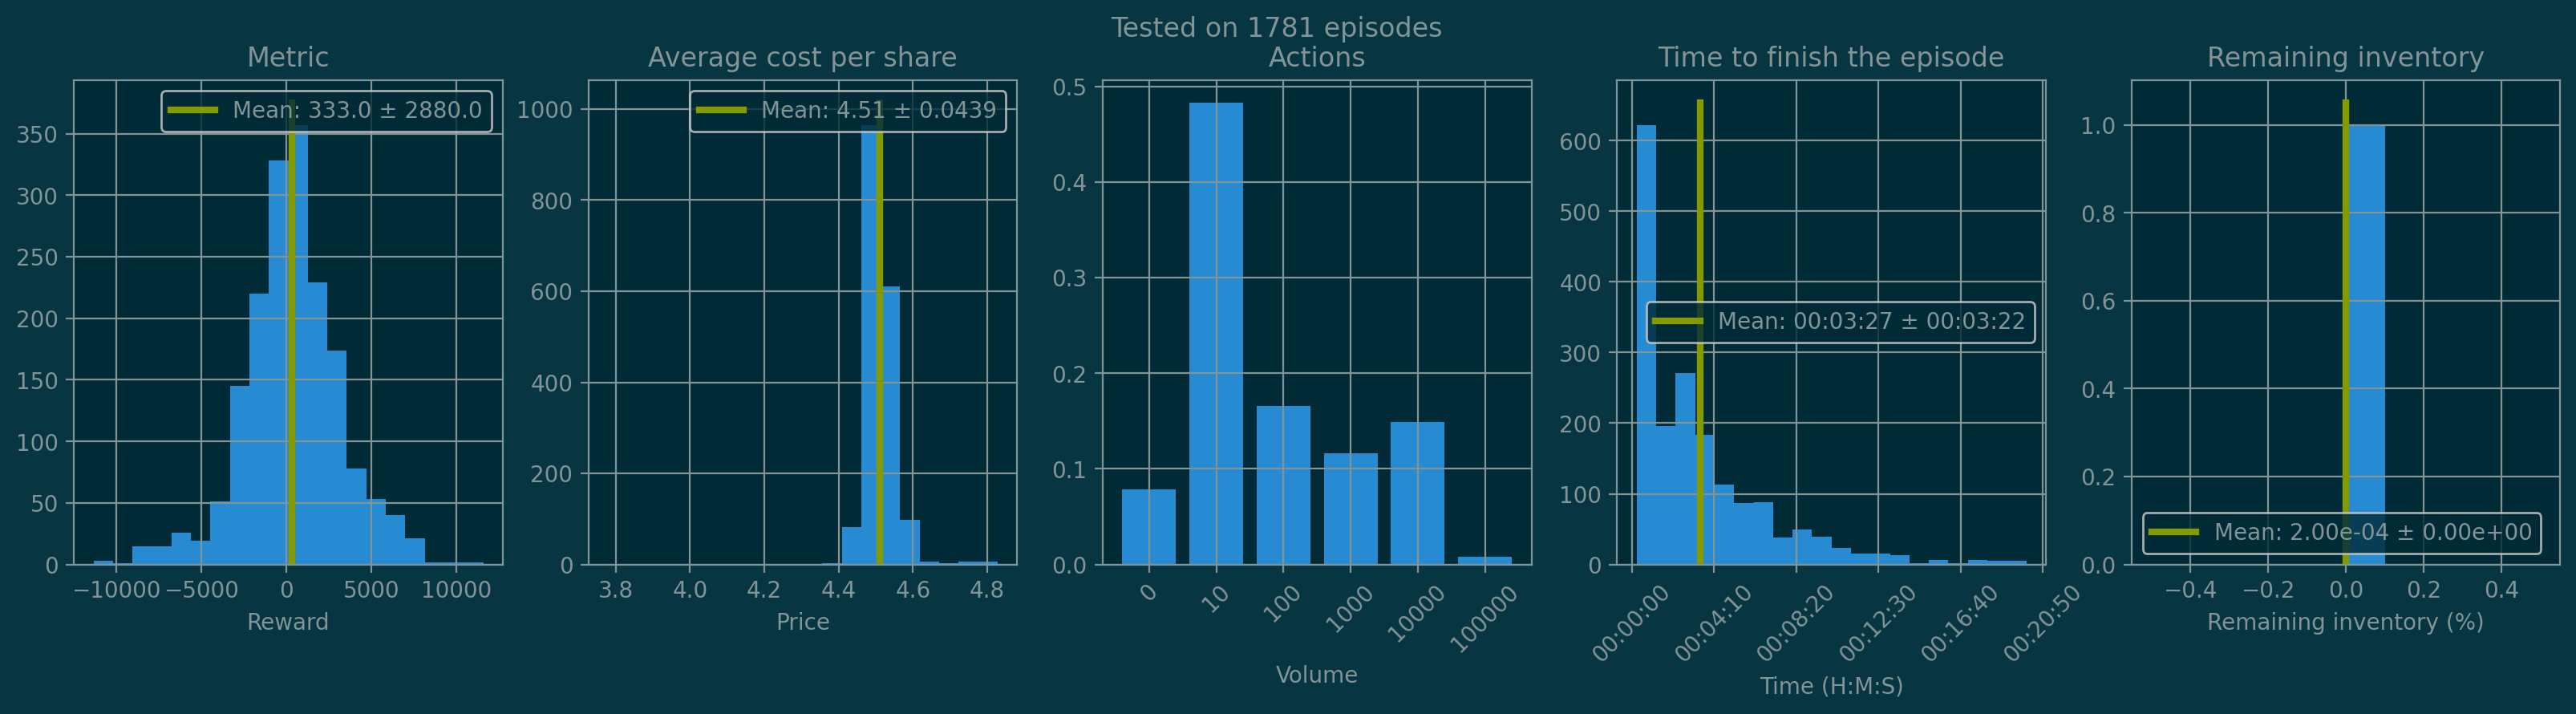

In [2]:
plot_test("./test/DDQN_mean_step.pickle", "./episodes")

* DDQN Trained with mean reward function

        Training:
<img src="./weights/DDQN_mean.png" width=800/>

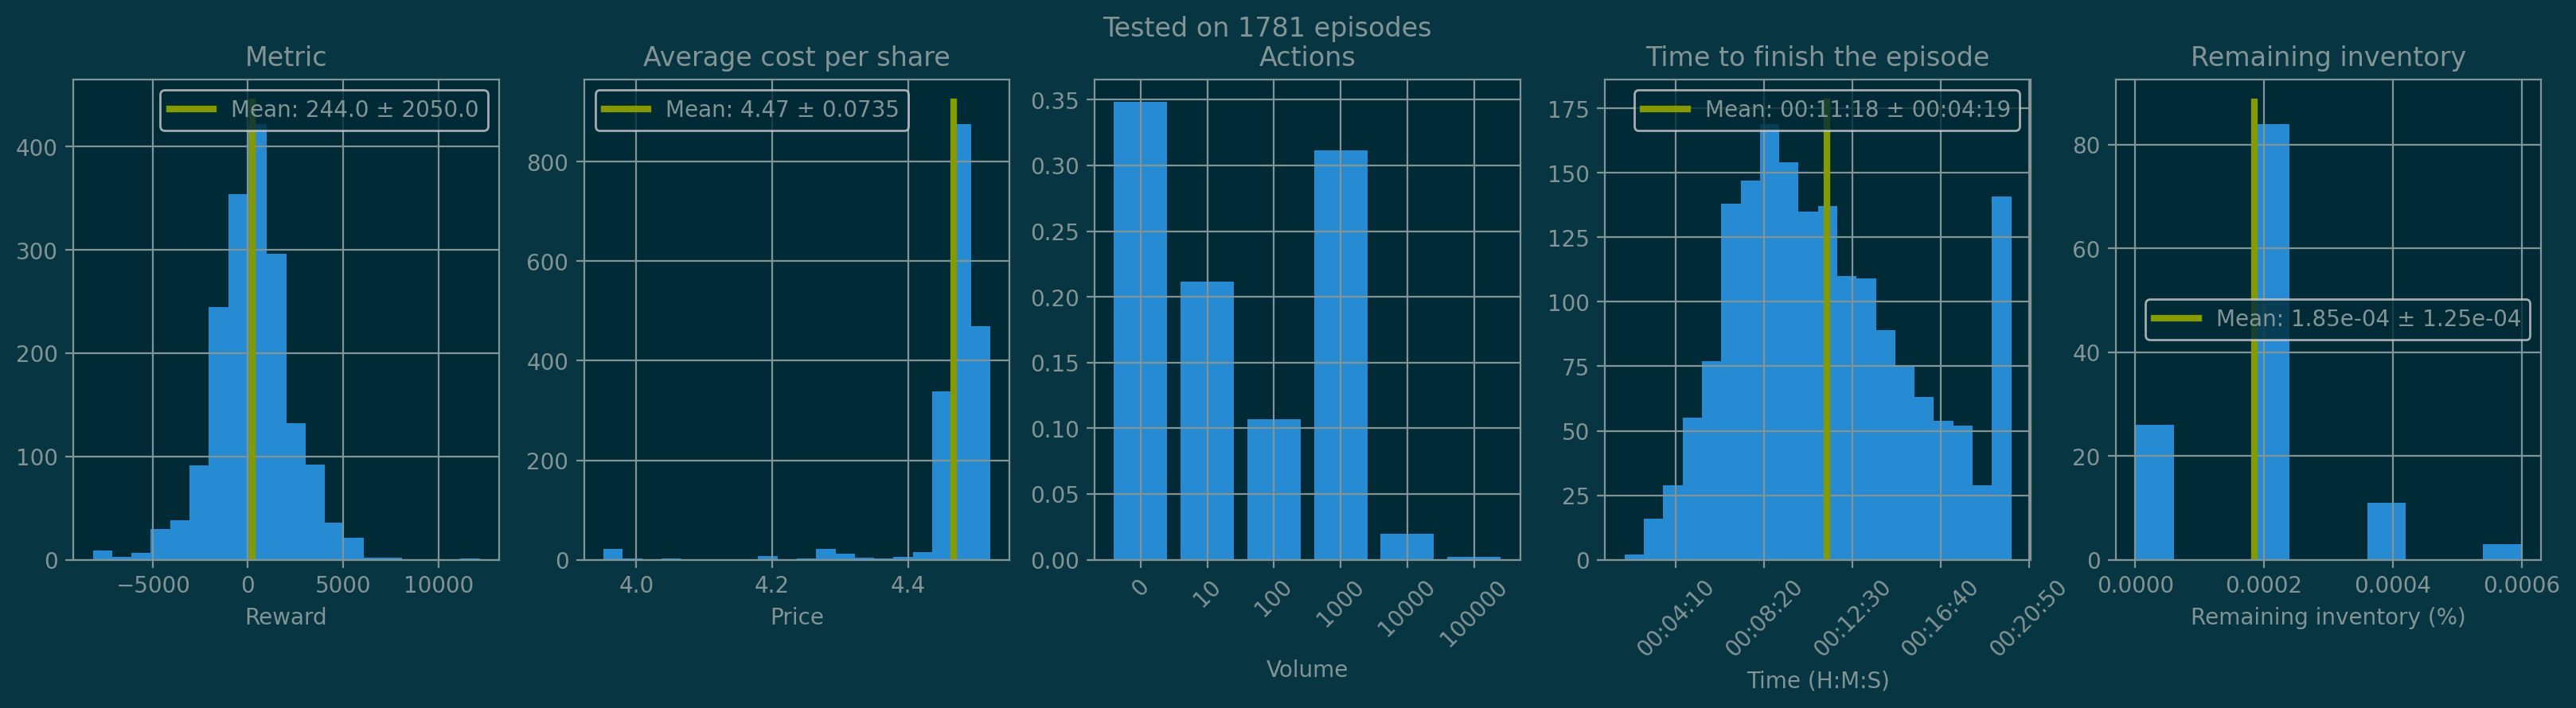

In [3]:
plot_test("./test/DDQN_mean.pickle", "./episodes")

* DDQN Trained with mean reward function (Penalty: $-1\times10^6 \cdot \frac{\text{Inventory not bought}}{\text{Total inventory}})$

        Training:
<img src=./weights/DDQN_mean-end1e6.png width=800/>

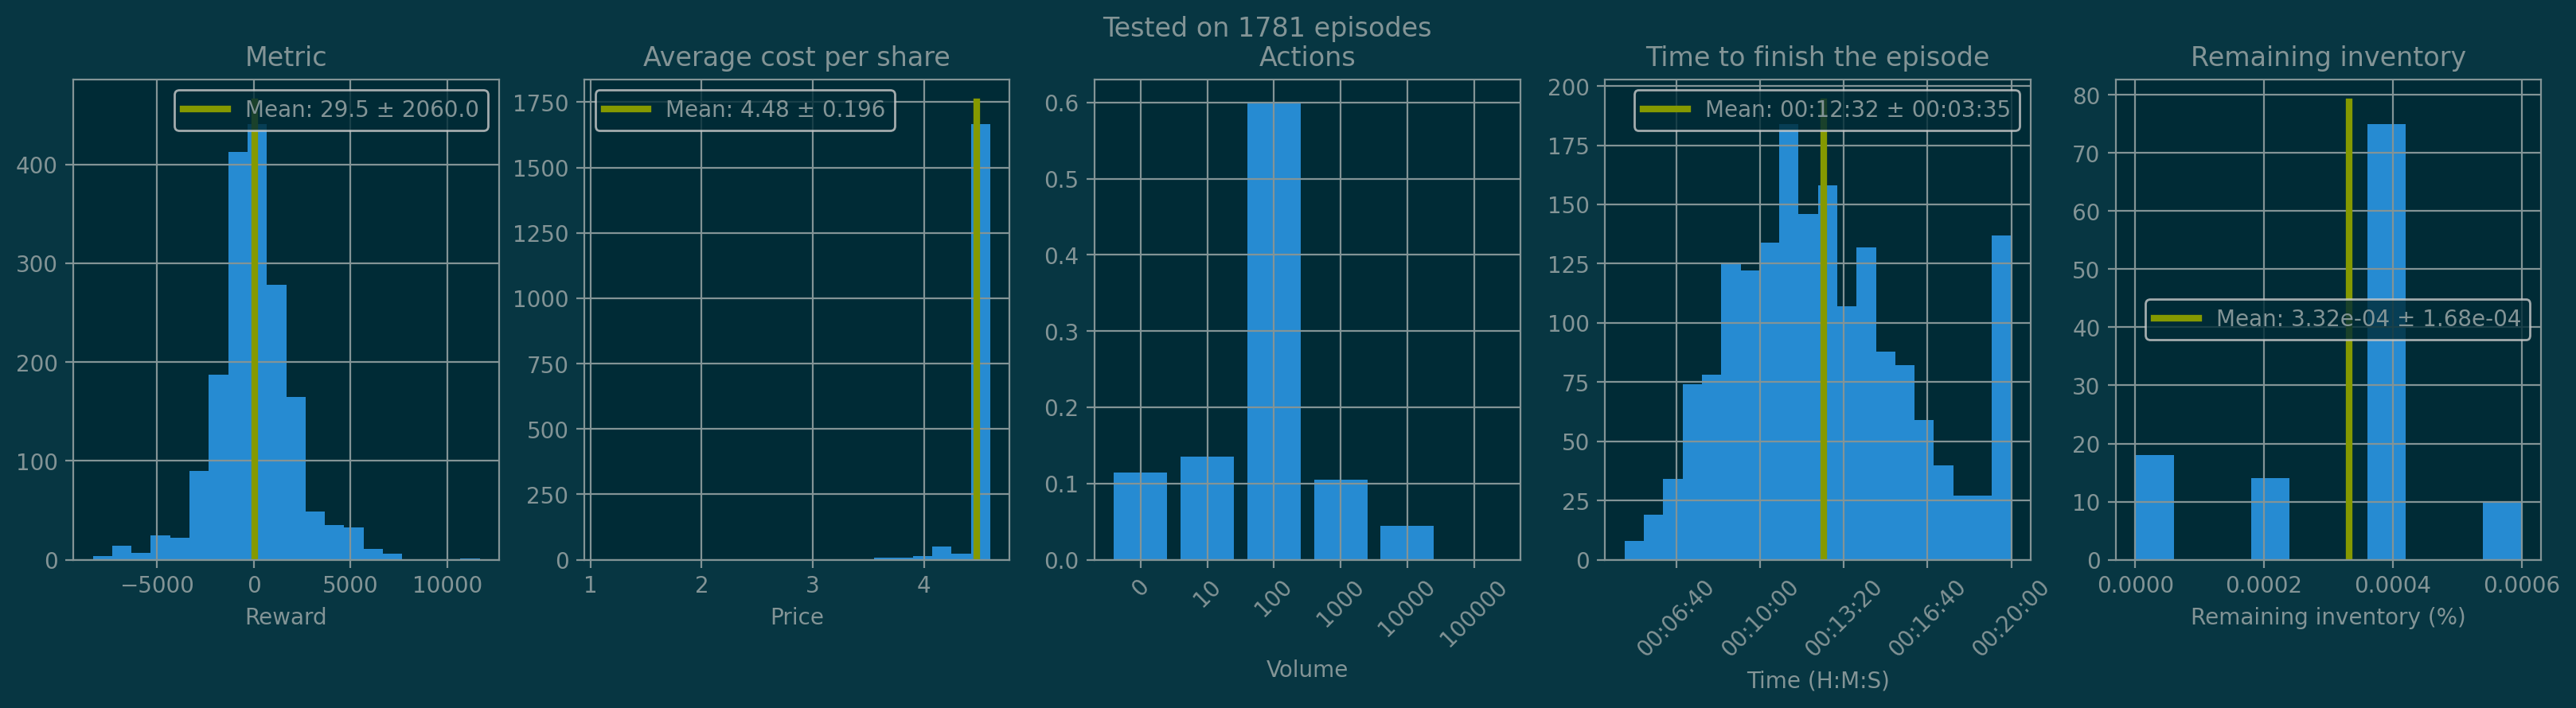

In [4]:
plot_test("./test/DDQN_mean-end1e6.pickle", "./episodes")

* DDQN Trained with mean reward function (Penalty: $-1\times10^6 \cdot \frac{\text{Inventory not bought}}{\text{Total inventory}}$, Reward: +1 per step)

        Training:
<img src=./weights/DDQN_mean+1step-end1e6.png width=800/>

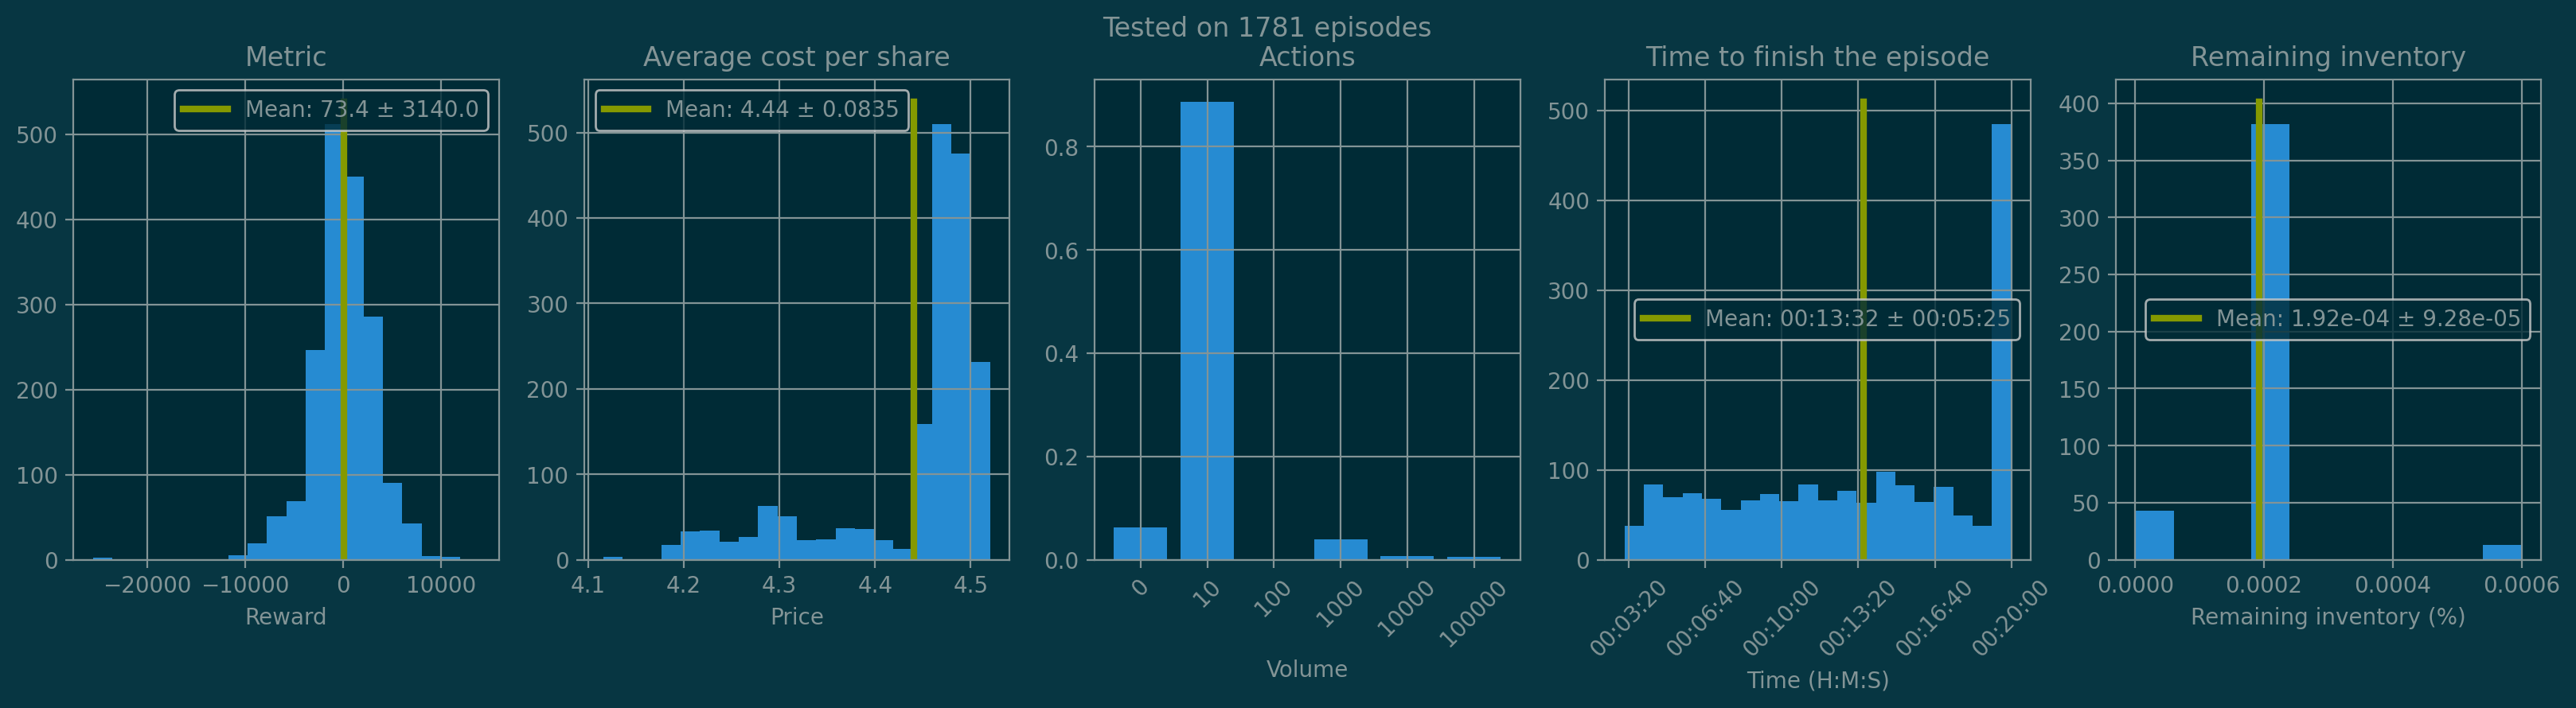

In [5]:
plot_test("./test/DDQN_mean+1step-end1e6.pickle", "./episodes")

* TWAP

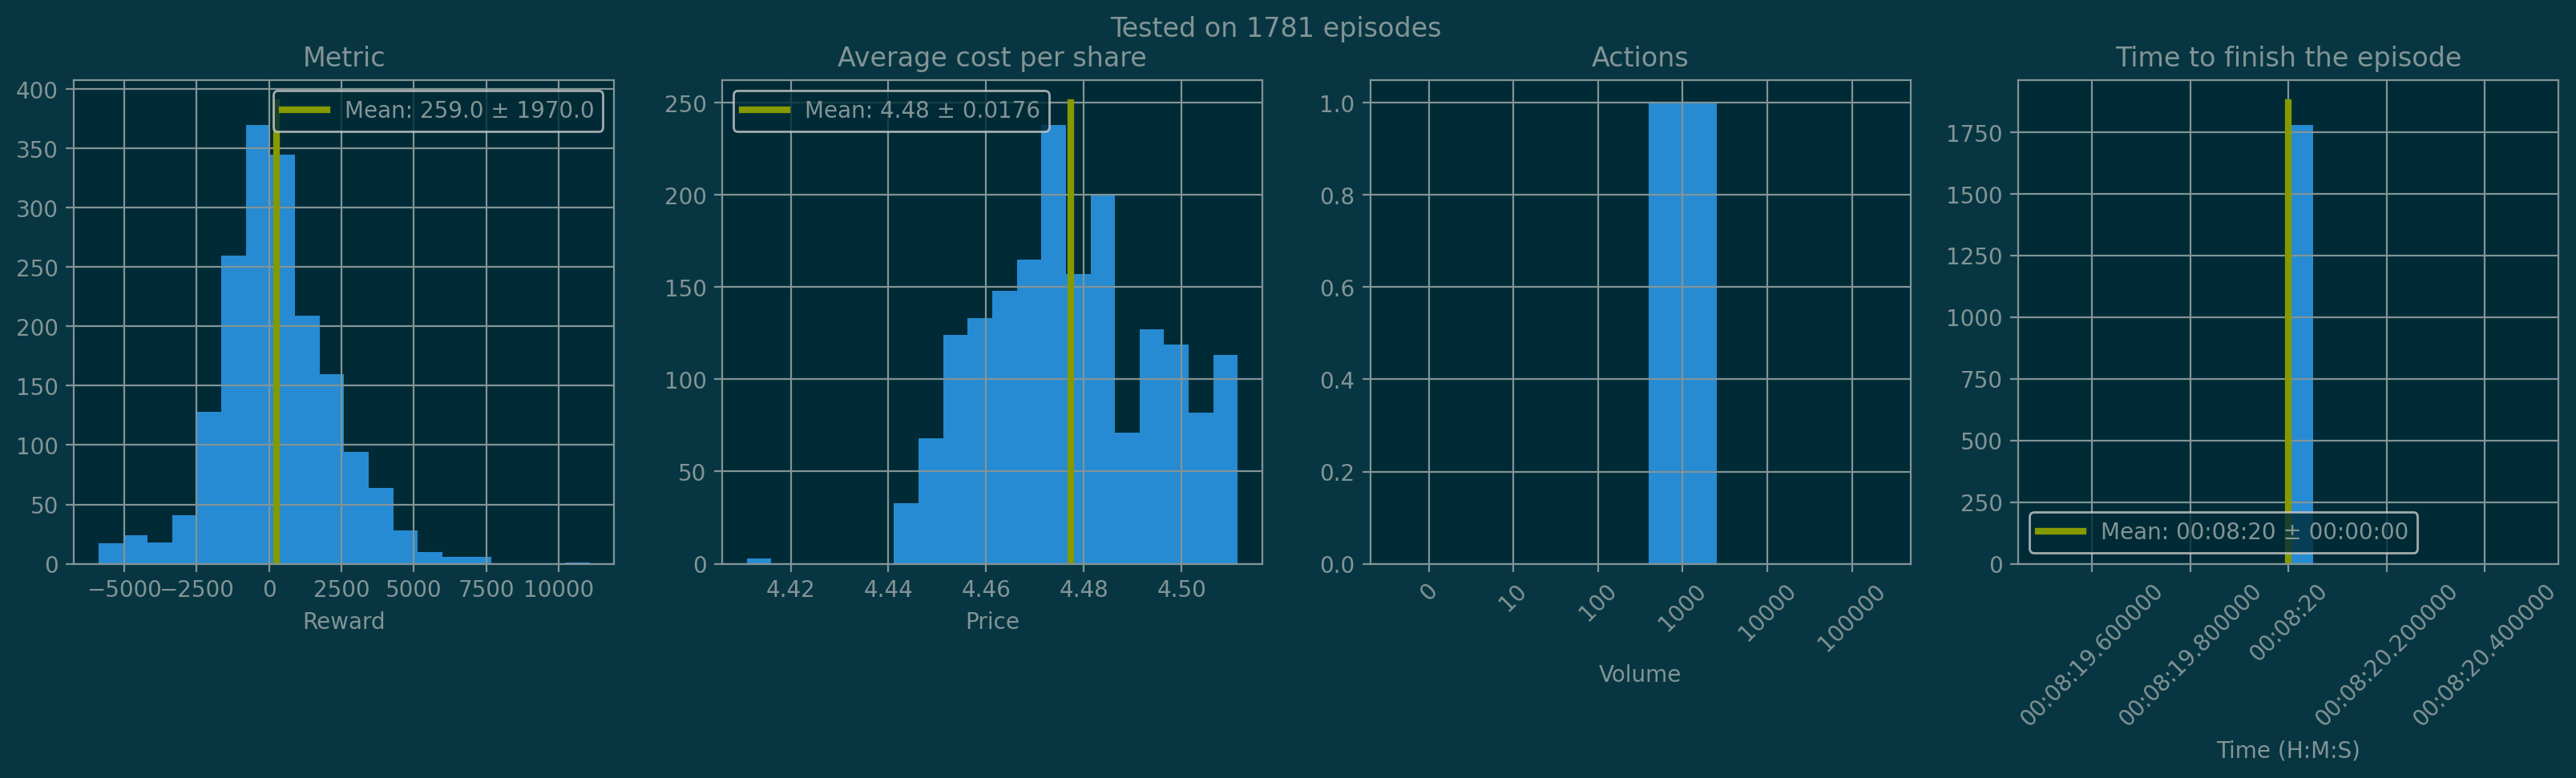

In [6]:
plot_test("./test/twap.pickle", "./episodes")

* Dynamic TWAP

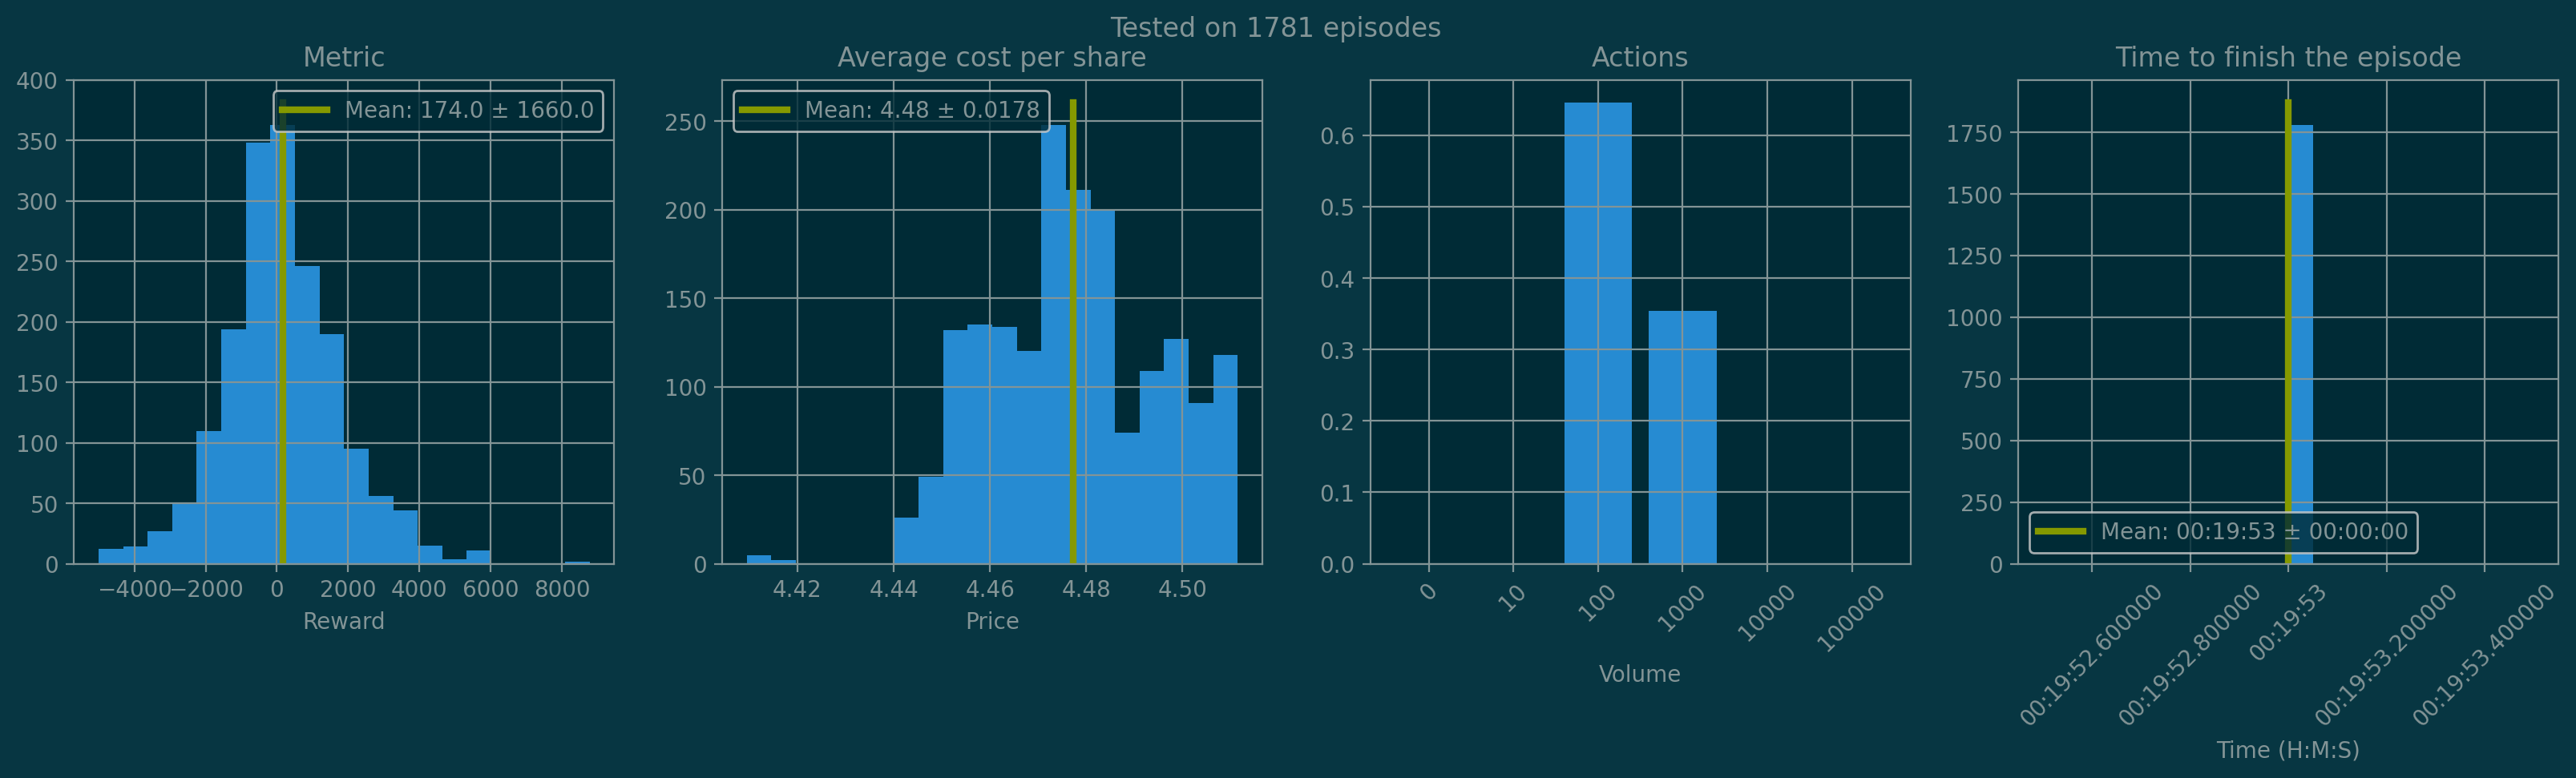

In [7]:
plot_test("./test/dtwap.pickle", "./episodes")

* POV

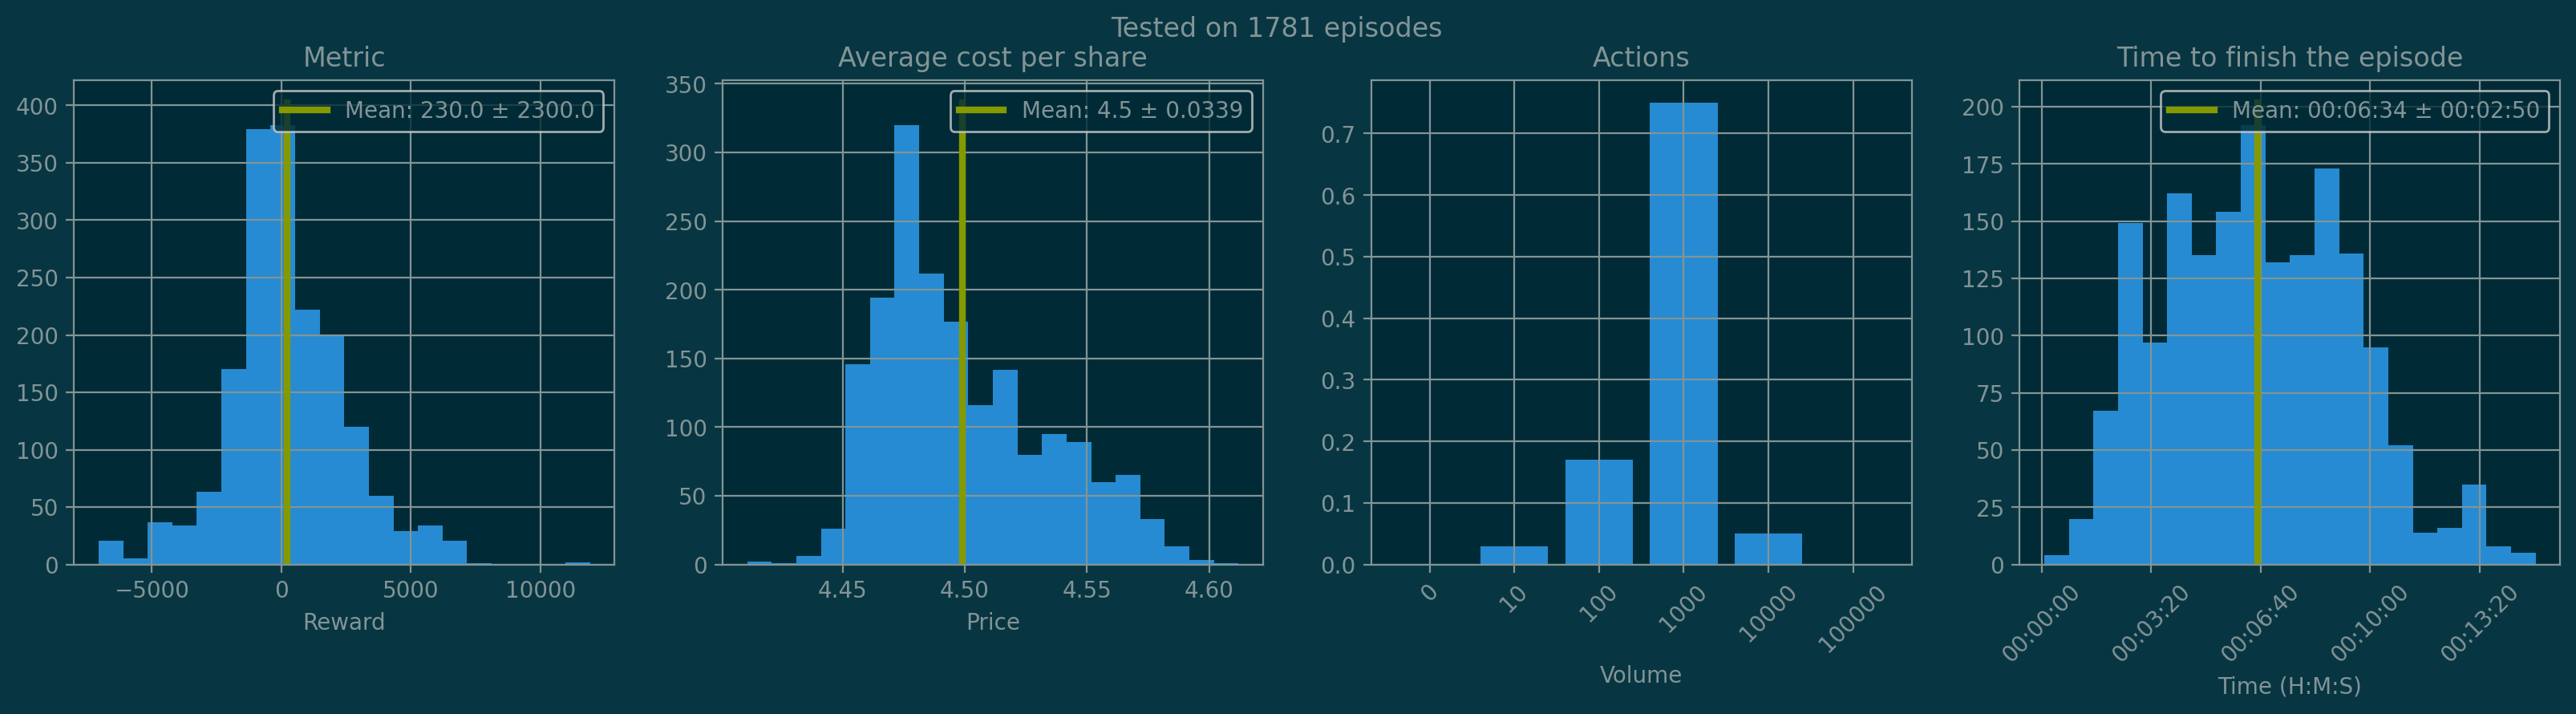

In [8]:
plot_test("./test/pov.pickle", "./episodes")

# Otras visualizaciones

## Episode

DQN
Total rewards: -978.3193630305648


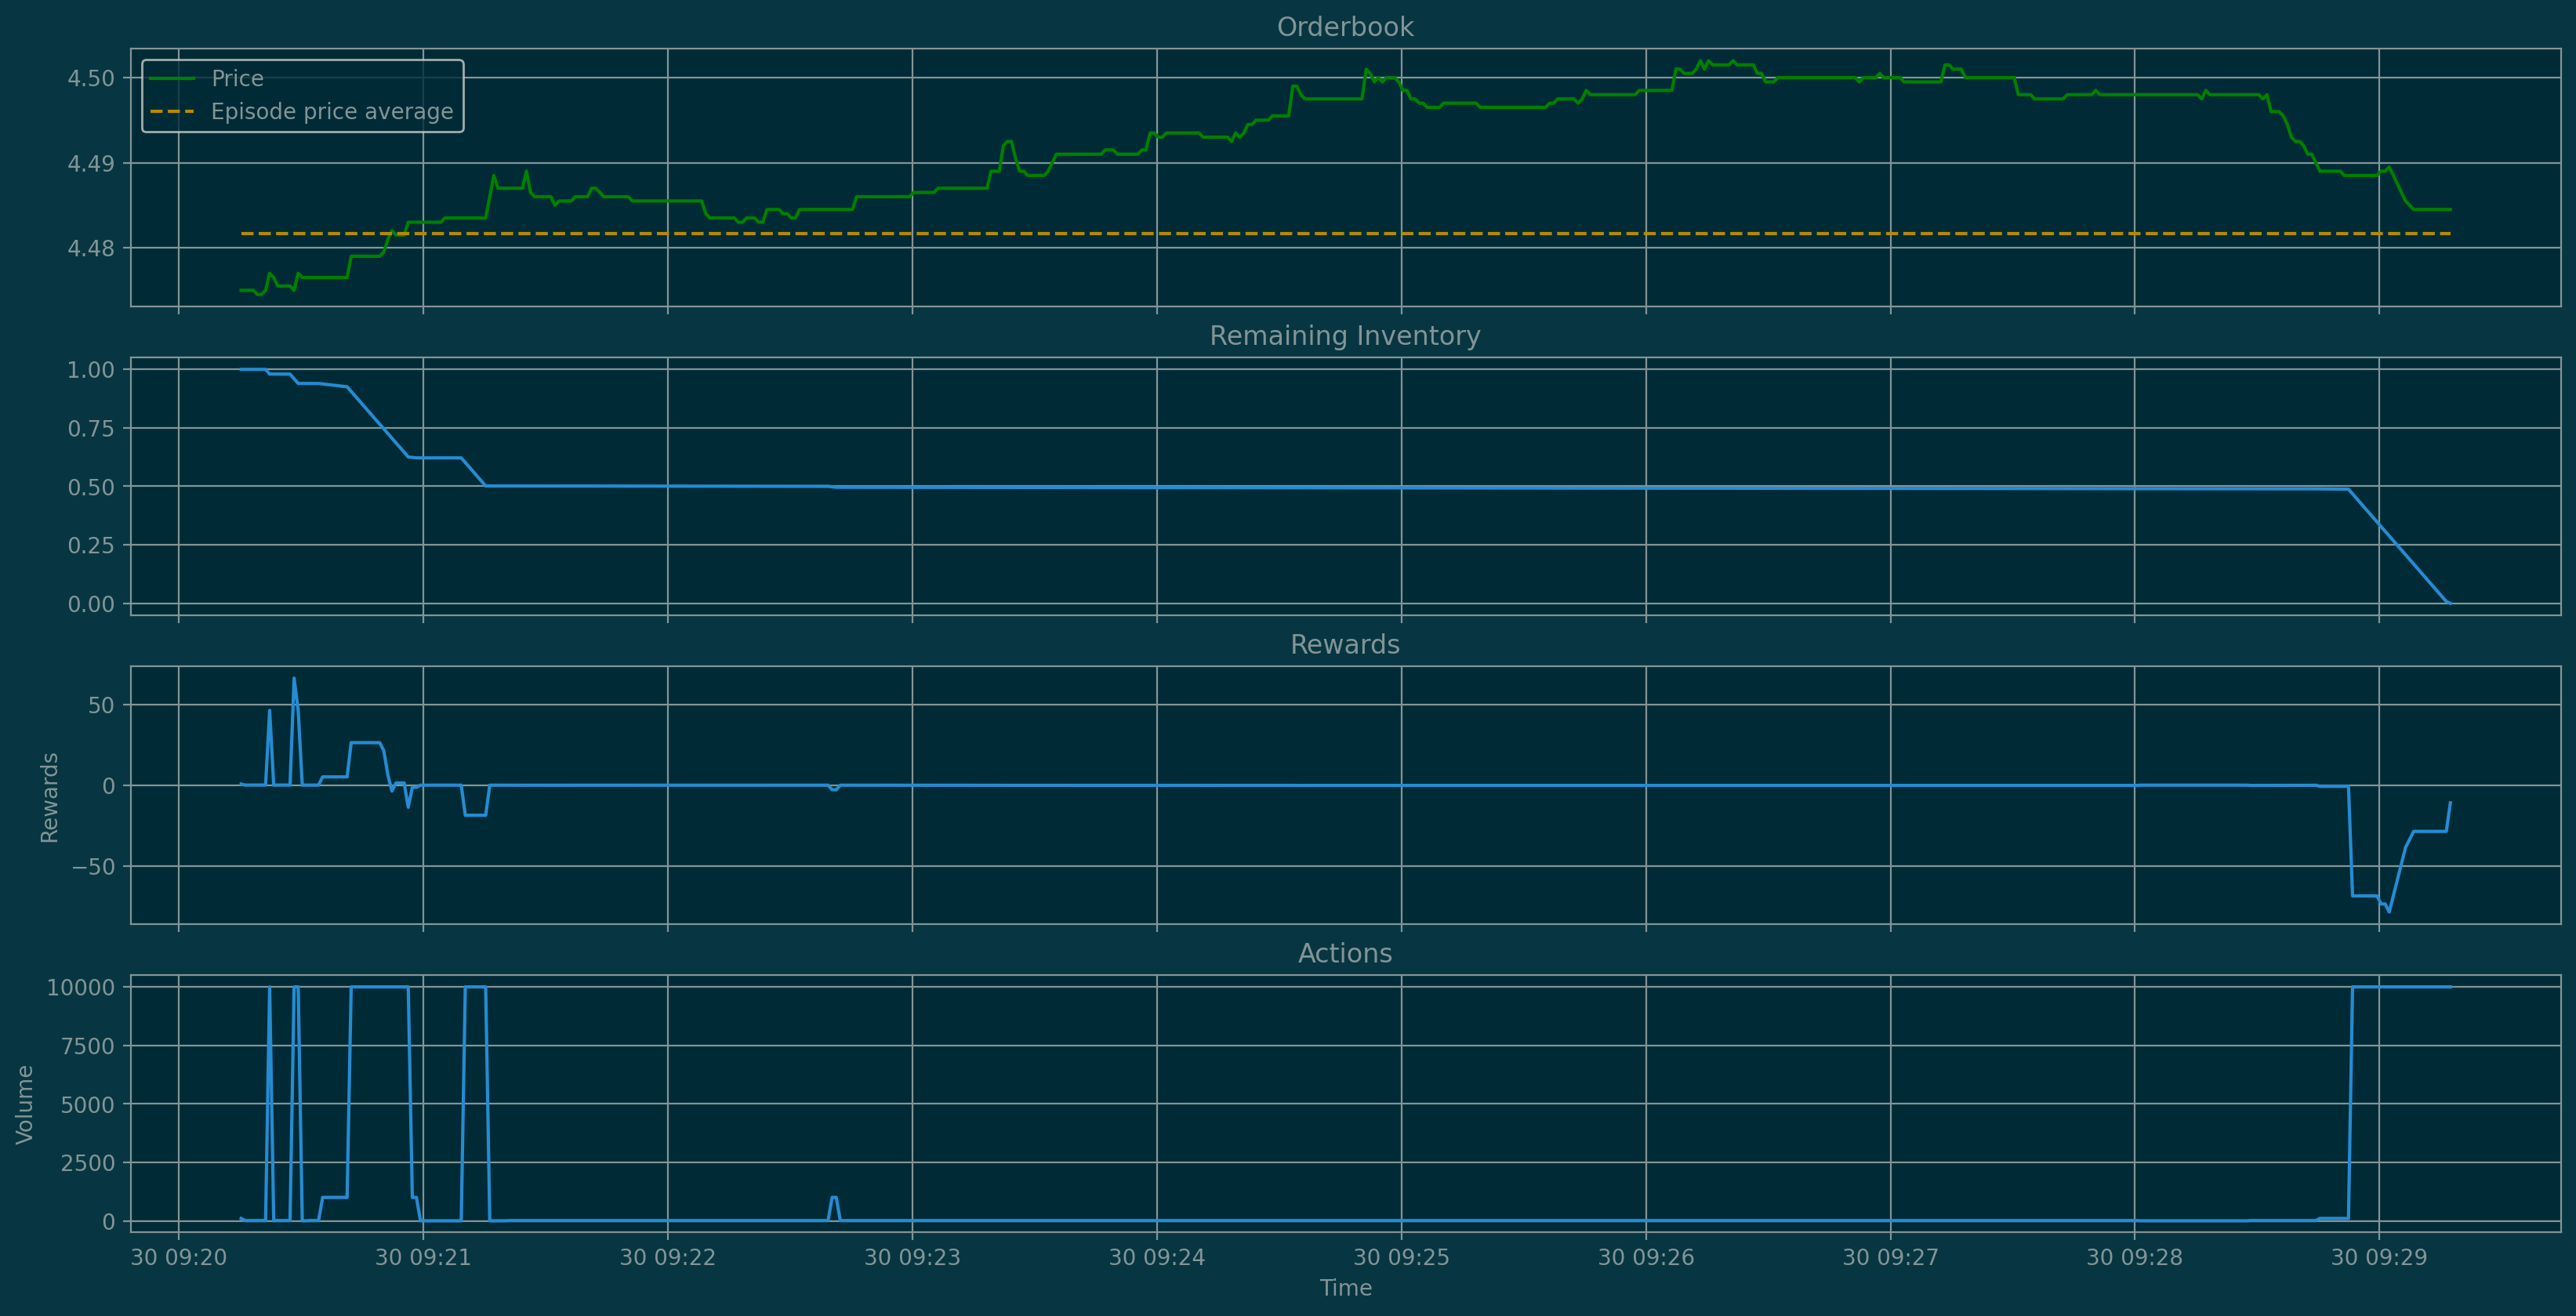

In [2]:
PATH = "./episodes"
env = MarketGym(PATH, mean_step)

weights_dqn = "./weights/DDQN_mean_step.pt"
alpha = 5e-4
gamma = 0.999
epsilon = 0.1
dqn = DQN(env, alpha, gamma, epsilon,
          double=True, save=weights_dqn)
dqn.Q_net.load_state_dict(torch.load(weights_dqn))

random_seed = 5
test_episode_agent(env, dqn, name="DQN", random_seed=random_seed)

## Episode evolution of state variables

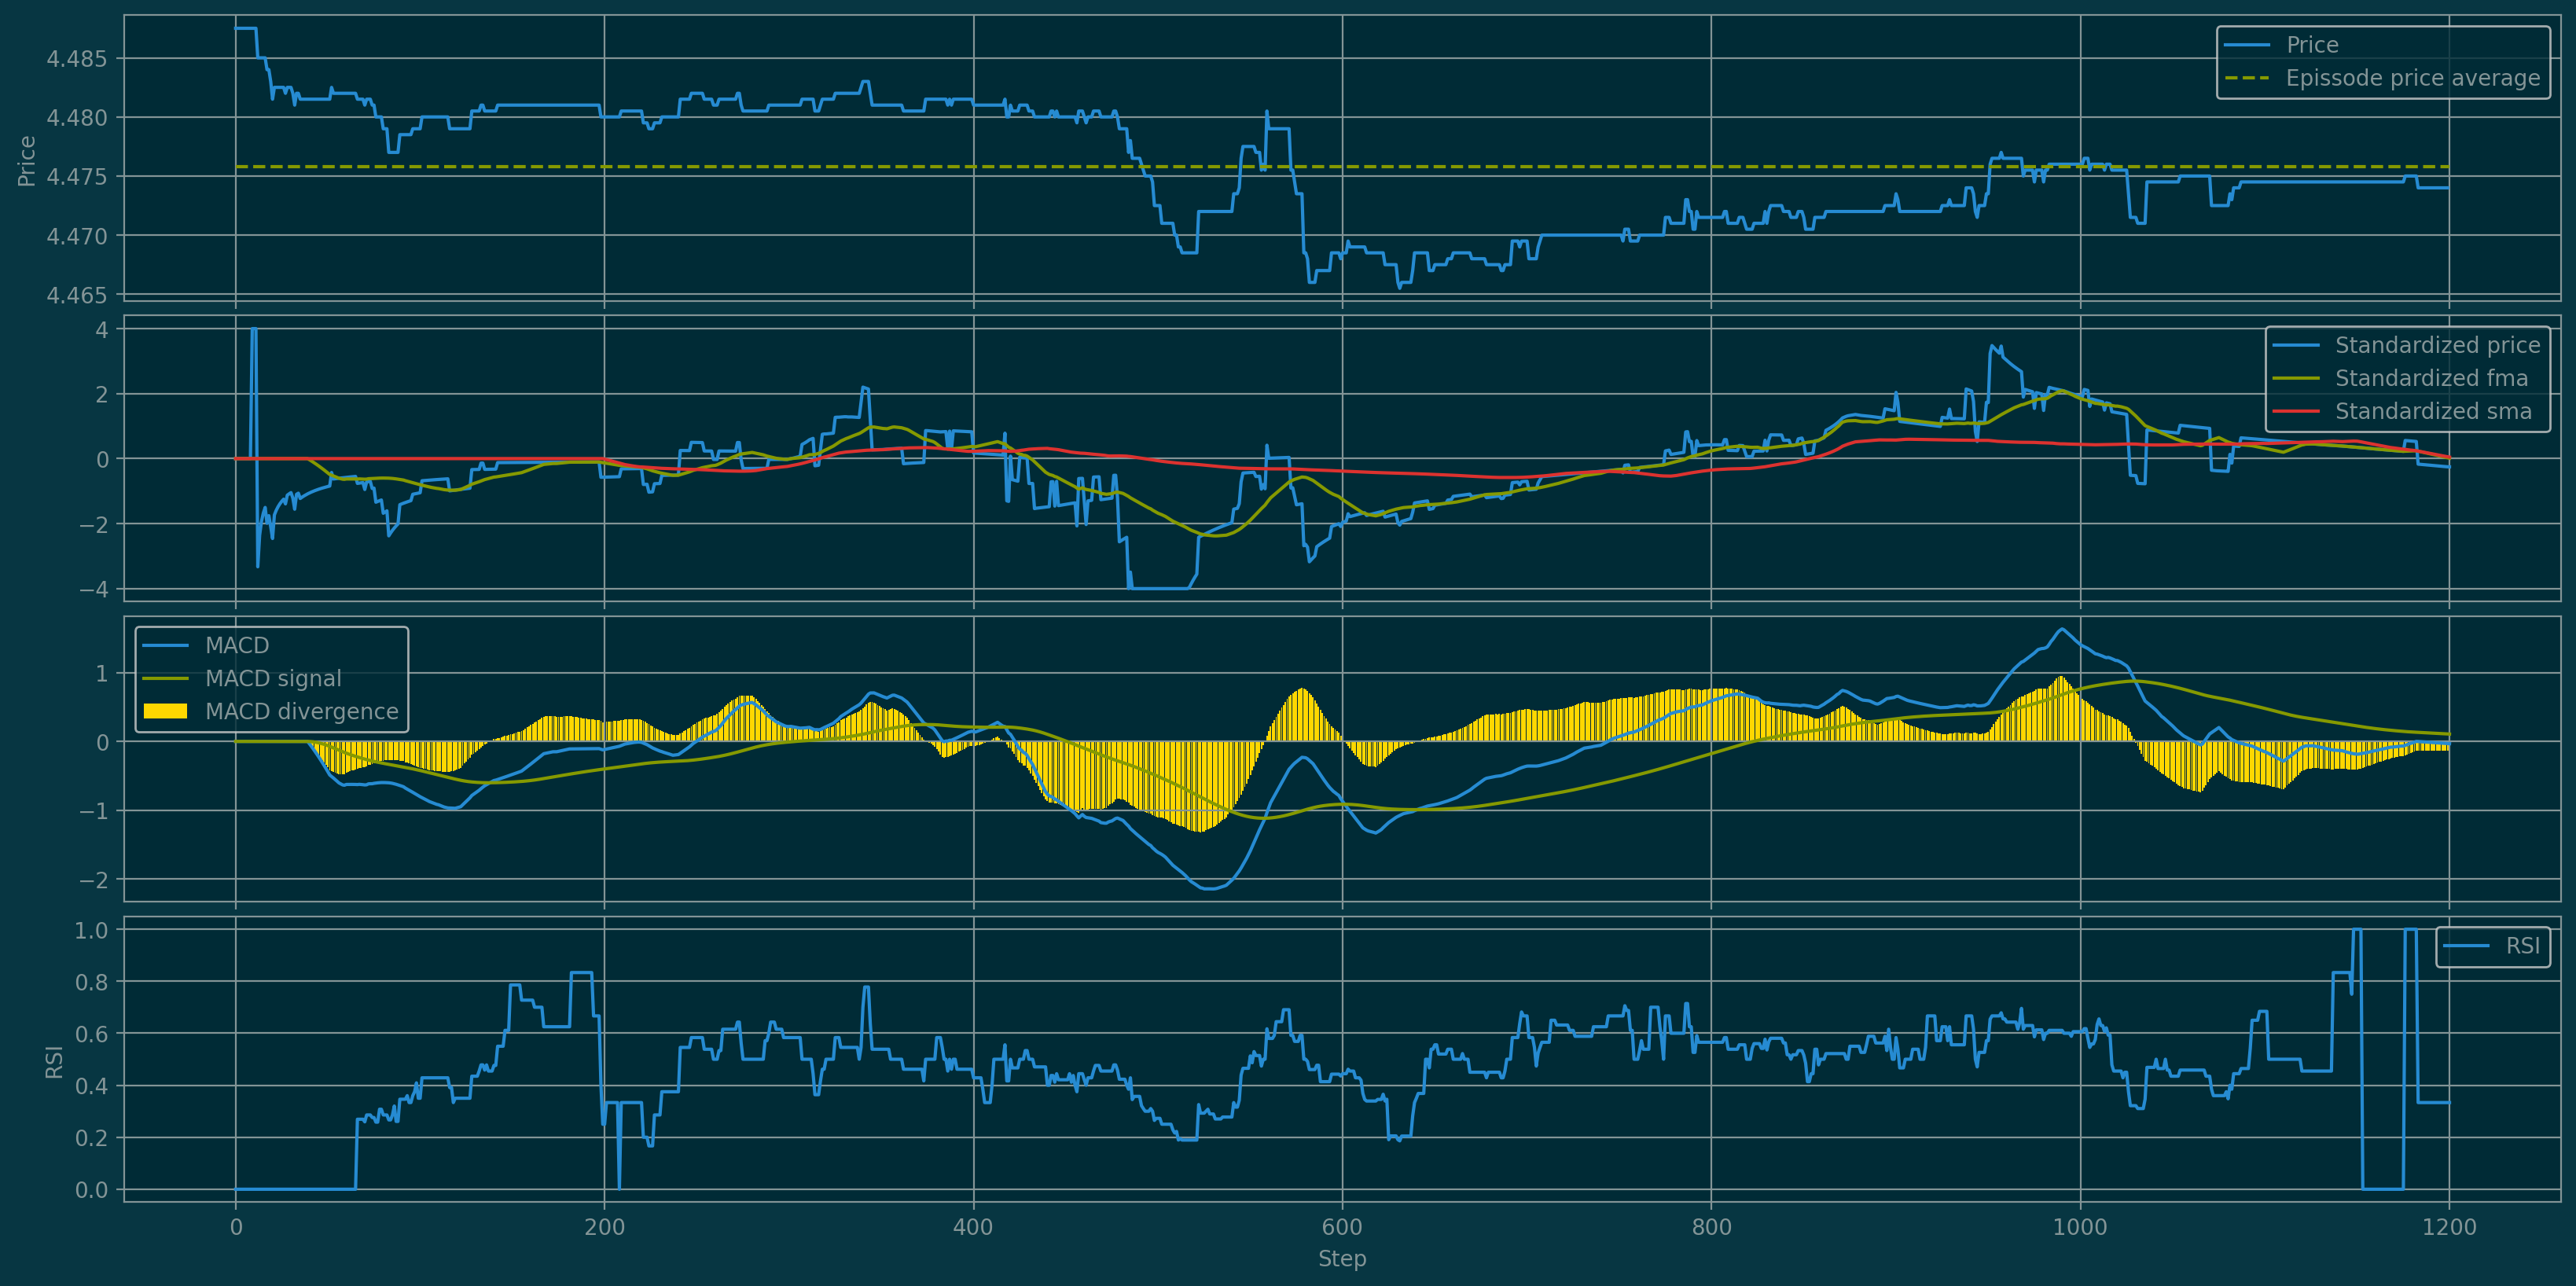

In [4]:
plot_state(env)